# Importação das bibliotecas e Leitura do Arquivo

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from collections import Counter
import re
import sys

# Baixa tokenizador e stopwords
try:
    nltk.download('punkt', quiet=False)
    nltk.download('punkt_tab', quiet=False)
    nltk.download('stopwords', quiet=False)
except Exception as e:
    print(f" Erro/n")

print(" Recursos prontos.\n")

# Leitura do arquivo
try:
    with open('machado.txt', 'r', encoding='utf-8') as f:
        texto_bruto = f.read()
except FileNotFoundError:
    print(" Erro: Arquivo 'machado.txt' não encontrado")
    sys.exit(1)

 Recursos prontos.



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Na célula abaixo fiz os processo de tokenização, normalização e a filtragem das stopwords.

Stopwords são palavras que não possuem tanto poder semântico

In [6]:
# Tokenização e Normalização

texto_normalizado = texto_bruto.lower() # conversão para minúsculas

#  Remove caracteres que não são letras ou espaços (mantém acentuação)
texto_limpo = re.sub(r'[^a-záéíóúâêôãõç\s]', '', texto_normalizado)

# Tokenização = divide em palavras no idioma português
palavras = nltk.word_tokenize(texto_limpo, language='portuguese')

# Filtragem de Stopwords

stopwords_pt = nltk.corpus.stopwords.words('portuguese')
palavras_filtradas = [
    palavra for palavra in palavras
    if palavra not in stopwords_pt and len(palavra) > 1
]


--- Top 10 Palavras ---
  Palavra  Frequência  Rank
0   disse        1430     1
1    casa        1236     2
2   olhos        1235     3
3    tudo        1144     4
4   ainda        1132     5
5    nada        1077     6
6   tempo        1053     7
7   outra        1026     8
8   coisa         961     9
9   outro         953    10


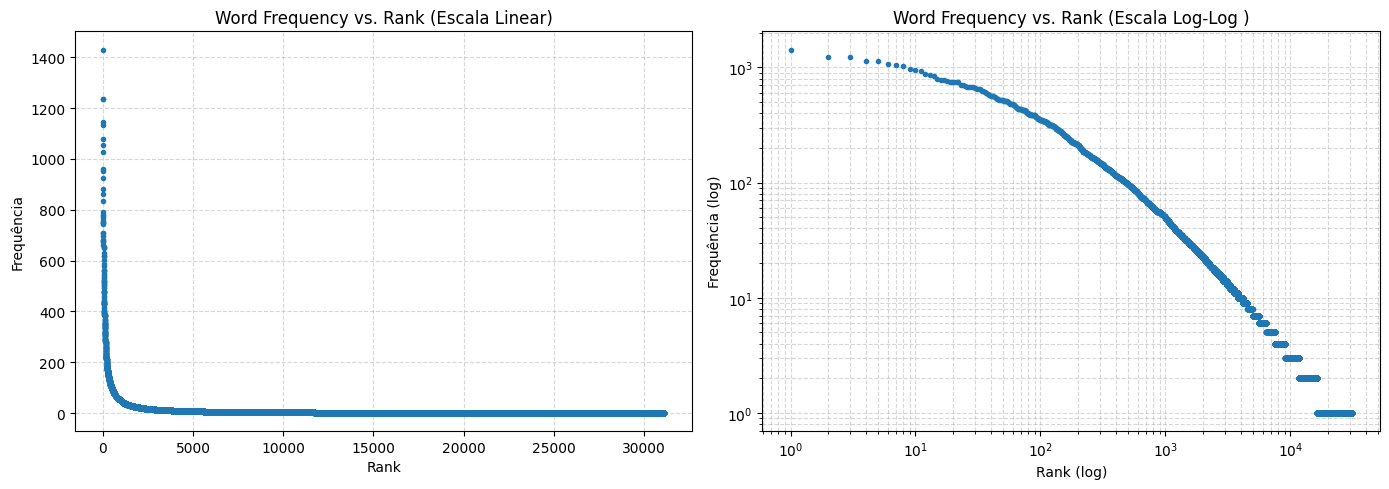


 Processamento concluído e gráficos gerados com sucesso!


In [8]:
# Cálculo da Frequência e Rank
frequencia = Counter(palavras_filtradas)

# Converte o contador em um DataFrame ordenado
df_zipf = (
    pd.DataFrame(frequencia.items(), columns=['Palavra', 'Frequência'])
    .sort_values(by='Frequência', ascending=False)
    .reset_index(drop=True)
)
df_zipf['Rank'] = df_zipf.index + 1

print("\n--- Top 10 Palavras ---") # 10 Palavras mais frequentes
print(df_zipf.head(10))

#Gráficos

rank = df_zipf['Rank']
freq = df_zipf['Frequência']

plt.figure(figsize=(14, 5))

# Gráfico 1: Escala Linear
plt.subplot(1, 2, 1)
plt.plot(rank, freq, marker='.', linestyle='none')
plt.title('Word Frequency vs. Rank (Escala Linear)')
plt.xlabel('Rank')
plt.ylabel('Frequência')
plt.grid(True, which="both", ls="--", alpha=0.5)

# Gráfico 2: Escala Log
plt.subplot(1, 2, 2)
plt.loglog(rank, freq, marker='.', linestyle='none')
plt.title('Word Frequency vs. Rank (Escala Log-Log )')
plt.xlabel('Rank (log)')
plt.ylabel('Frequência (log)')
plt.grid(True, which="both", ls="--", alpha=0.5)

plt.tight_layout()
plt.show()

print("\n Processamento concluído e gráficos gerados com sucesso!")